# Semillero AD Universidad EIA.

### Encuentro  #3.

### Fecha: 21.02.24

## Tema: Numpy II.


#### Contenido:

1. Vistas de arreglos con slicing. El metodo copy.

2. Reshaping of arrays.

3. Funcion newaxis

4. Concatenacion de arreglos.

5. Splitting de arreglos.

6. Calculos con Numpy.

7. Ufuncs y vectorizacion.


In [1]:
import numpy as np
import time
import sys

In [2]:
S = range(1000)  # numero de bytes para lista y ndarray
print(sys.getsizeof(5)*len(S))

D = np.arange(1000)
print(D.size*D.itemsize)

28000
8000


#1. Vistas de arreglos con slicing. El metodo copy.

Numpy array slicing return views rather than copies.

In [3]:
x2 = np.random.randint(20, size=(3,4))  #rand, random
print(x2)


[[ 9 18 12 18]
 [ 8 14  0 11]
 [16  1  7  2]]


In [4]:
x2_sub = x2[:2,:2]
print(x2_sub)
x2_sub[0,0] = 99
print(x2)

[[ 9 18]
 [ 8 14]]
[[99 18 12 18]
 [ 8 14  0 11]
 [16  1  7  2]]


Metodo copy. Este metodo nos permite manipular subconjuntos de datos e introducir  cambios sin tocar el set original.

El metodo copy nos permite tambien realizar cambios en un dataset.

In [5]:
print(x2)    # es un metodo muy util para hacer cambios internos y al mismo tiempo conservar el dataset original
x2_sub_copy = x2[:2,:2].copy()
print(x2_sub_copy)
x2_sub_copy[0,0] = 42
print(x2_sub_copy)
print(x2)

[[99 18 12 18]
 [ 8 14  0 11]
 [16  1  7  2]]
[[99 18]
 [ 8 14]]
[[42 18]
 [ 8 14]]
[[99 18 12 18]
 [ 8 14  0 11]
 [16  1  7  2]]


In [6]:
arr = np.array([1, 2, 3, 4, 5])
x = arr.copy()
arr[0] = 42

print(arr)
print(x)

[42  2  3  4  5]
[1 2 3 4 5]


In [7]:
arr = np.array([1, 2, 3, 4, 5])
x = arr.view()
arr[0] = 42

print(arr)
print(x)
print(type(arr))
print(type(x))

[42  2  3  4  5]
[42  2  3  4  5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
arr = np.array([1, 2, 3, 4, 5])  #atributo base. a x no le pertenecen los datos del arreglo.

x = arr.copy()
y = arr.view()

print(x.base)
print(y.base)

None
[1 2 3 4 5]


#2. Reshaping of arrays.

 Es una operacion de suma importancia para el tratamiento de bases de datos. Como regla general cuando hacemos analisis de datos debemos transformar los datasets para por operar sobre ellos. Operacion muy utilizado en ML para trasponer matrices.

Utilizaremos el metodo reshape.

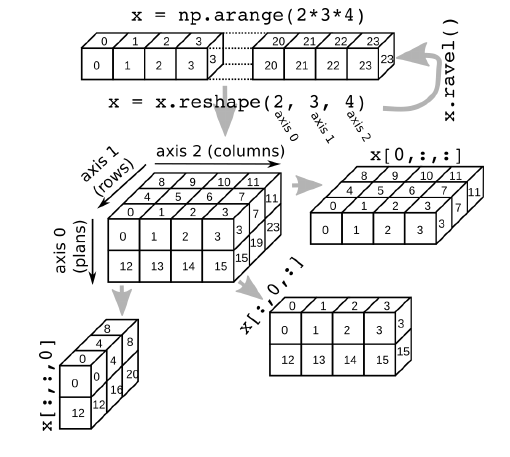

In [9]:
grid = np.arange(1, 10+1)
print(grid)
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[ 1  2  3  4  5  6  7  8  9 10]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [10]:
y = np.arange(35).reshape(5,7)
print(y)
print(y[1:5:2, ::3]) #star:stop:step

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]]
[[ 7 10 13]
 [21 24 27]]


In [11]:
arr = np.arange(10, dtype=float).reshape((2,5)) # metodo flatten
print(arr)
arr_flt = arr.flatten()
arr_flt[0] = 33
print(arr_flt)

[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]
[33.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


In [12]:
arr_flt = arr_flt.ravel() #metodo ravel
print(arr_flt)
print(arr)

[33.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]


#3. Funcion  newaxis

Es una funcion muy importante en el analisis de datos. De lejos una de las mas utilizadas para estas tareas.

In [ ]:
x = np.array([1, 2, 3])
print(x)
print(x.reshape((1, 3)))
print(x[np.newaxis, :])   # hace lo mismo que reshape pero permite operar sobre indexing and slicing
print(x.reshape((3, 1)))  # aumentando la funcionalidad de estas operaciones.
print(x[:, np.newaxis])

[1 2 3]
[[1 2 3]]
[[1 2 3]]
[[1]
 [2]
 [3]]
[[1]
 [2]
 [3]]


#4. Array concatenation.

Utilizacion de las rutinas: np.concatenate, np.vstack, np.hstack

In [13]:
x = np.array([1, 2 ,3])
y = np.array([3, 2, 1])
np.concatenate([x ,y])

array([1, 2, 3, 3, 2, 1])

In [14]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [15]:
np.concatenate([grid, grid], axis=0) # parametro axis =1 por filas, x = 0 por columnas.

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [16]:
#x = [1, 2, 3]
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])
t = np.vstack([x, grid])  # concatenacion vertical
print(t)
z = np.array([[99],
              [99]])
u = np.hstack([z, grid]) # concatenacion horizontal
print(u)
m = np.dstack(u)  # transfoma filas en columnas y viceversa
print(m)

[[1 2 3]
 [9 8 7]
 [6 5 4]]
[[99  9  8  7]
 [99  6  5  4]]
[[[99 99]
  [ 9  6]
  [ 8  5]
  [ 7  4]]]


#5. Splitting of arrays

np.split, np.hsplit, np.vsplit

In [18]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [1, 5])
print(x1, x2, x3) # N split point ---> N+1 subarrays

[1] [ 2  3 99 99] [3 2 1]


In [ ]:
grid = np.arange(16).reshape((4, 4))
print(grid)
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [19]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)


[[9 8]
 [6 5]]
[[7]
 [4]]


In [28]:
grid = np.arange(8).reshape((2, 2, 2))
print(grid.ndim)
print(grid)
l = np.dsplit(grid, 2)
print(l)

3
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]
[array([[[0],
        [2]],

       [[4],
        [6]]]), array([[[1],
        [3]],

       [[5],
        [7]]])]


In [29]:
x = np.arange(16).reshape(4, 2, 2)
print(x)
y = np.dsplit(x, 2)
print(y)
z = np.dsplit(x, np.array([3,6]))
#print(z)

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]

 [[12 13]
  [14 15]]]
[array([[[ 0],
        [ 2]],

       [[ 4],
        [ 6]],

       [[ 8],
        [10]],

       [[12],
        [14]]]), array([[[ 1],
        [ 3]],

       [[ 5],
        [ 7]],

       [[ 9],
        [11]],

       [[13],
        [15]]])]


#6. Calculos en Numpy

El secreto para que Numpy realice operaciones rapidas en ciclos es la vectorizacion. Las operaciones vectorizadas en Numpy estan implementadas a traves de Ufuncs.

In [30]:
np.arange(5)/np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [31]:
x = np.arange(9).reshape((3, 3))
2**x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

#7. Ufuncs y vectorizacion.

 opera sobre dos tipos: unary(operate on a single input) y binary(operate on two inputs)

In [33]:
x = np.arange(10)
print('x=',x)
print('x+2=',x+2)
print('x*2=',x*2)
print('x/2=',x/2)
print('x//2=',x//2) #division con residuo
print('-x=',-x)
print('x**2=',x**2)
print('x%3=',x%3) # residuo. 9%4=1. Sirve para generar una lista con entradas logicas.

x= [0 1 2 3 4 5 6 7 8 9]
x+2= [ 2  3  4  5  6  7  8  9 10 11]
x*2= [ 0  2  4  6  8 10 12 14 16 18]
x/2= [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
x//2= [0 0 1 1 2 2 3 3 4 4]
-x= [ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]
x**2= [ 0  1  4  9 16 25 36 49 64 81]
x%3= [0 1 2 0 1 2 0 1 2 0]


#Metodos de agregacion.

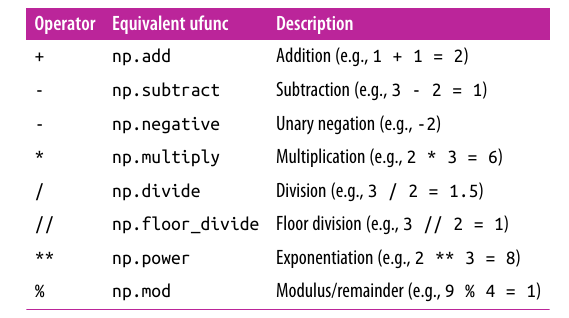

In [34]:
x1 = np.add(x, 2)  # metodos de agregacion. Forman la base para realizar operaciones sobre arreglos.
print(x1)
x1 = np.power(x, 2)
print(x1)
x1 = np.mod(x, 2)
print(x1)

[ 2  3  4  5  6  7  8  9 10 11]
[ 0  1  4  9 16 25 36 49 64 81]
[0 1 0 1 0 1 0 1 0 1]


In [35]:
x = np.array([-2, -1, 0, 1, 2])
abs(x) #python

array([2, 1, 0, 1, 2])

In [36]:
x1 = np.absolute(x)
print(x1)
x1 = np.abs(x)
print(x1)

[2 1 0 1 2]
[2 1 0 1 2]


In [37]:
x = np.array([3-4j, 4-3j, 2+0j])
np.abs(x)

array([5., 5., 2.])

Los resultados son entregados con precision de maquina.

In [38]:
theta = np.linspace(0, np.pi, 3)
print('theta=', theta)
print('sin(theta)=', np.sin(theta))
print('cos(theta)=', np.cos(theta))
print('tan(theta)=', np.tan(theta))

theta= [0.         1.57079633 3.14159265]
sin(theta)= [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta)= [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta)= [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [39]:
x = [-1, 0, 1]
print('x=', x)
print('arcsin(x)=', 4*np.arcsin(x))
print('arccos(x)=', np.arccos(x))
print('arctan(x)=', np.arctan(x))

x= [-1, 0, 1]
arcsin(x)= [-6.28318531  0.          6.28318531]
arccos(x)= [3.14159265 1.57079633 0.        ]
arctan(x)= [-0.78539816  0.          0.78539816]


In [40]:
x = [1, 2, 3]
print('x=', x)
print('e^x=', np.exp(x))
print('2^x=', np.exp2(x))
print('4^x=', np.power(4, x))

x= [1, 2, 3]
e^x= [ 2.71828183  7.3890561  20.08553692]
2^x= [2. 4. 8.]
4^x= [ 4 16 64]


In [41]:
x = [1, 2, 4, 10]
print('x=', x)
print('ln(x)=', np.log(x))
print('log2(x)=', np.log2(x))
print('log10(x)=', np.log10(x))

x= [1, 2, 4, 10]
ln(x)= [0.         0.69314718 1.38629436 2.30258509]
log2(x)= [0.         1.         2.         3.32192809]
log10(x)= [0.         0.30103    0.60205999 1.        ]


In [42]:
x = np.array([0, 0.001, 0.01, 0.1])
print('exp(x)-1=', np.expm1(x))
print('ln(1+x)=', np.log1p(x))
y = np.log(x+1)
np.log1p(x) == y



exp(x)-1= [0.         0.0010005  0.01005017 0.10517092]
ln(1+x)= [0.         0.0009995  0.00995033 0.09531018]


array([ True, False, False, False])

In [44]:
from scipy import special
x = [1, 5, 10]
print('gamma(x)=', special.gamma(x))
print('ln|gamma(x)|=', special.gammaln(x))
print('beta(x,2)=', special.beta(x,2))


gamma(x)= [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)|= [ 0.          3.17805383 12.80182748]
beta(x,2)= [0.5        0.03333333 0.00909091]


In [ ]:
x = np.array([0, 0.3, 0.7, 1.0])
print('erf(x)=', special.erf(x)) #funcion de error
print('erfc(x)=', special.erfc(x)) #funcion de error complementaria. erfc=1-erf
print('erfinv(x)=', special.erfinv(x)) # funcion de error inversa

erf(x)= [0.         0.32862676 0.67780119 0.84270079]
erfc(x)= [1.         0.67137324 0.32219881 0.15729921]
erfinv(x)= [0.         0.27246271 0.73286908        inf]


#Final encuentro 3!!!
________________________________________________________





